## データの取り込み

In [326]:
import numpy as np
import pandas as pd
import pandas_profiling as pdp
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sys

sys.path.append('../utils')
import feature_utils as ftr

warnings.filterwarnings('ignore')

In [327]:
train_df = pd.read_csv('../data/input/train.csv')
test_df = pd.read_csv('../data/input/test.csv')

In [328]:
display(train_df.head())
display(test_df.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## データ分析

### データの分解、結合

In [329]:
train_df_cp = train_df.copy()
test_df_cp = test_df.copy()

Y_tmp = train_df_cp['SalePrice']
train_df_cp = train_df_cp.drop('SalePrice',axis=1)

train_df_cp['cat'] = 'train'
test_df_cp['cat'] = 'test'
X_all = pd.concat([train_df_cp,test_df_cp],axis=0).reset_index(drop = True)

### データの基本統計数値確認

In [5]:
pdp.ProfileReport(X_all)

Number of variables,81
Number of observations,2919
Total Missing (%),5.9%
Total size in memory,1.8 MiB
Average record size in memory,648.0 B
Numeric,37
Categorical,44
Boolean,0
Date,0
Text (Unique),0
Rejected,0


### 重要度の見積もり

In [330]:
from sklearn.preprocessing import LabelEncoder

for i in range(train_df.shape[1]):
    if train_df_cp.iloc[:,i].dtypes == object:
        lbl = LabelEncoder()
        lbl.fit(list(train_df_cp.iloc[:,i].values) + list(test_df_ｃｐ.iloc[:,i].values))
        train_df_cp.iloc[:,i] = lbl.transform(list(train_df_cp.iloc[:,i].values))
        test_df_cp.iloc[:,i] = lbl.transform(list(test_df_cp.iloc[:,i].values))

In [331]:
train_df_cp = train_df_cp.fillna(train_df_cp.median())

Training done using Random Forest


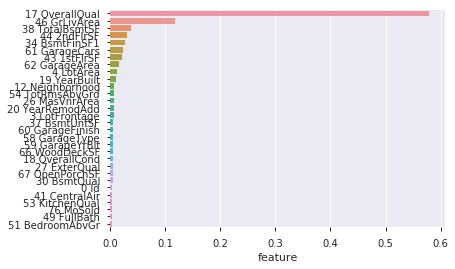

In [332]:
# feature importance using random forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=80, max_features='auto')
rf.fit(train_df_cp, Y_tmp)
print('Training done using Random Forest')

feature=rf.feature_importances_
f = pd.DataFrame({'number': range(len(feature)),'name':train_df_cp.columns.values,
             'feature': feature[:]}).sort_values('feature',ascending=False)

sns.barplot(x=f['feature'].head(30),y=f['number'].head(30).astype(str)+' '+f['name'].head(30))
plt.show()

## データ加工

### initialの特徴の保存

In [9]:
class ftr_init(ftr.Feature):
    def create_features(self,name):
        self.df[name] = X_all[name]

class ftr_init_answer(ftr.Feature):
    def create_features(self,name):
        self.df = pd.DataFrame(Y)        
        
for c in X_all.columns:
    ftr_init(c).run(c).save()

ftr_init_answer('SalePrice').run().save()

[Id] start
[Id] done in 0 s
[MSSubClass] start
[MSSubClass] done in 0 s
[MSZoning] start
[MSZoning] done in 0 s
[LotFrontage] start
[LotFrontage] done in 0 s
[LotArea] start
[LotArea] done in 0 s
[Street] start
[Street] done in 0 s
[Alley] start
[Alley] done in 0 s
[LotShape] start
[LotShape] done in 0 s
[LandContour] start
[LandContour] done in 0 s
[Utilities] start
[Utilities] done in 0 s
[LotConfig] start
[LotConfig] done in 0 s
[LandSlope] start
[LandSlope] done in 0 s
[Neighborhood] start
[Neighborhood] done in 0 s
[Condition1] start
[Condition1] done in 0 s
[Condition2] start
[Condition2] done in 0 s
[BldgType] start
[BldgType] done in 0 s
[HouseStyle] start
[HouseStyle] done in 0 s
[OverallQual] start
[OverallQual] done in 0 s
[OverallCond] start
[OverallCond] done in 0 s
[YearBuilt] start
[YearBuilt] done in 0 s
[YearRemodAdd] start
[YearRemodAdd] done in 0 s
[RoofStyle] start
[RoofStyle] done in 0 s
[RoofMatl] start
[RoofMatl] done in 0 s
[Exterior1st] start
[Exterior1st] done

### 欠損値の補完

In [394]:
# 0埋め
class fill_zero(ftr.Feature):
    def create_features(self,name):
        self.df[name] = X_all[name].fillna(0)

for c in ['TotalBsmtSF','GarageCars','LotFrontage','MasVnrArea']:
    fill_zero('{}_zero'.format(c)).run(c).save() 

[TotalBsmtSF_zero] start
[TotalBsmtSF_zero] done in 0 s
[GarageCars_zero] start
[GarageCars_zero] done in 0 s
[LotFrontage_zero] start
[LotFrontage_zero] done in 0 s
[MasVnrArea_zero] start
[MasVnrArea_zero] done in 0 s


### 築年数の計算

In [49]:
class Age(ftr.Feature):
    def create_features(self,name):
        self.df['Age'] = 2010 - X_all['YearBuilt']

class Remod(ftr.Feature):
    def create_features(self,name):
        self.df['Remod'] = X_all.apply(lambda x : 1 if x['YearBuilt']<x['YearRemodAdd'] else 0,axis = 1)

Age('Age').run().save()

Remod('Remod').run().save()

[Age] start
[Age] done in 0 s
[Remod] start
[Remod] done in 0 s


### ラベル付け

In [390]:
from sklearn.preprocessing import LabelEncoder

class Qual(ftr.Feature):
    def create_features(self,name):
        self.df[name] = X_all[name].map({np.nan:0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

class Label(ftr.Feature):
    def create_features(self,name):
        lbl = LabelEncoder()
        self.df[name] = lbl.fit(list(X_all[name]))   
        self.df[name] = lbl.transform(list(X_all[name]))
        
class Flg(ftr.Feature):
    def create_features(self,name):
        self.df[name] = X_all[name].map({'Y':1,'N':0})   

class Finish(ftr.Feature):
    def create_features(self,name):
        self.df[name] = X_all[name].map({np.nan:0,'Unf':1,'RFn':2,'Fin':3})                  

for c in ['BsmtQual','ExterQual','FireplaceQu','KitchenQual']:  
    Qual('{}_label'.format(c)).run(c).save()
          
for c in ['Neighborhood','GarageType','SaleCondition']:
    Label('{}_label'.format(c)).run(c).save()
    
for c in ['CentralAir']:
    Flg('{}_label'.format(c)).run(c).save()    
    
for c in ['GarageFinish']:
    Finish('{}_label'.format(c)).run(c).save()        

[BsmtQual_label] start
[BsmtQual_label] done in 0 s
[ExterQual_label] start
[ExterQual_label] done in 0 s
[FireplaceQu_label] start
[FireplaceQu_label] done in 0 s
[KitchenQual_label] start
[KitchenQual_label] done in 0 s
[Neighborhood_label] start
[Neighborhood_label] done in 0 s
[GarageType_label] start
[GarageType_label] done in 0 s
[SaleCondition_label] start
[SaleCondition_label] done in 0 s
[CentralAir_label] start
[CentralAir_label] done in 0 s
[GarageFinish_label] start
[GarageFinish_label] done in 0 s


### One-hot-vector作成

In [384]:
class Ohe(ftr.Feature):
    def create_features(self,name):
        self.df = pd.get_dummies(X_all[name].apply(lambda x : str(x))) 
        
for c in ['Neighborhood','GarageType','SaleCondition','MSSubClass','MSZoning']:
    Ohe('{}_ohe'.format(c)).run(c).save()        

[Neighborhood_ohe] start
[Neighborhood_ohe] done in 0 s
[GarageType_ohe] start
[GarageType_ohe] done in 0 s
[SaleCondition_ohe] start
[SaleCondition_ohe] done in 0 s
[MSSubClass_ohe] start
[MSSubClass_ohe] done in 0 s
[MSZoning_ohe] start
[MSZoning_ohe] done in 0 s


### 販売時期の計算

In [14]:
class Salses(ftr.Feature):
    def create_features(self,name):
        self.df['Sales'] = X_all.apply(lambda x : 12 * (2010 -x['YrSold']) + 8 - x['MoSold'],axis=1) 

Salses('Sales').run().save()

[Sales] start
[Sales] done in 0 s


### ポーチの大きさの計算

In [34]:
class Porch(ftr.Feature):
    def create_features(self,name):
        self.df['Porch'] = X_all.apply(lambda x : x['OpenPorchSF'] + x['EnclosedPorch'] + x['3SsnPorch'] + x['ScreenPorch'],axis=1) 

Porch('Porch').run().save()     

[Porch] start
[Porch] done in 0 s


### 平屋フラグ

In [35]:
class Plain(ftr.Feature):
    def create_features(self,name):
        self.df['Plain'] = X_all.apply(lambda x : 1 if x['2ndFlrSF'] + x['LowQualFinSF'] == 0 else 0,axis=1) 

Plain('Plain').run().save()     

[Plain] start
[Plain] done in 0 s


### プールの有無

In [139]:
class Pool(ftr.Feature):
    def create_features(self,name):
        self.df['Pool'] = X_all['PoolArea'].apply(lambda x : 1 if x > 0 else 0) 

Pool('Pool').run().save()  

[Pool] start
[Pool] done in 0 s


## 特徴量選択

In [412]:
import numpy as np
import pandas as pd
import pandas_profiling as pdp
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sys
%matplotlib inline

sys.path.append('../utils')
import feature_utils as ftr

warnings.filterwarnings('ignore')

features = [
    'OverallQual',
    'GrLivArea',
    'Plain',    
#     'BsmtQual',
    'BsmtQual_label',    
#     'TotalBsmtSF',
    'TotalBsmtSF_zero',    
#     'GarageCars',
    'GarageCars_zero',    
    'LotArea',
#     'LotFrontage',
    'LotFrontage_zero',    
#     'Neighborhood',
    'Neighborhood_label',
#     'Neighborhood_ohe',    
#     'YearBuilt',
    'Age',
#     'YearRemodAdd',
    'Remod',
    'TotRmsAbvGrd',
#     'GarageType',
    'GarageType_label',
#     'GarageType_ohe',    
#     'YrSold',
#     'MoSold',
    'Sales',
    'Porch',
    'Pool',
#     'SaleCondition',
    'SaleCondition_label',    
#     'SaleCondition_ohe',    
    'ExterQual_label',
    'CentralAir_label',
    'Fireplaces',
    'FireplaceQu_label',
    'FullBath',
    'KitchenQual_label',
    'BedroomAbvGr',
    'OverallCond',
    'GarageFinish_label',
    'MasVnrArea_zero',
    'MSZoning_ohe',
    'MSSubClass_ohe',
    'cat'
]
X_features = ftr.load_datasets(features)
Y_features = ftr.load_datasets(['SalePrice'])

X = X_features[X_features['cat']=='train'].copy()
X_submit =  X_features[X_features['cat']=='test'].copy()

X = X.drop(['cat'],axis=1)
X_submit = X_submit.drop(['cat'],axis=1)

In [413]:
# X_tmp = train_df_cp[[c for c in train_df_cp.columns if c not in X.columns]]

### 対数に変換する

In [414]:
Y = np.log(Y_features)

Training done using Random Forest


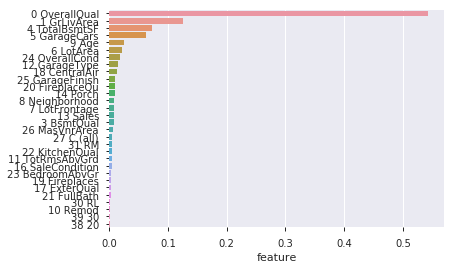

In [415]:
# feature importance using random forest
from sklearn.ensemble import RandomForestRegressor
# rf = RandomForestRegressor(n_estimators=80, max_features='auto')
params = {'n_estimators':80 , 'max_features':'auto'}
rf = RandomForestRegressor(**params)

rf.fit(X, Y)
print('Training done using Random Forest')

feature=rf.feature_importances_
f = pd.DataFrame({'number': range(len(feature)),'name':X.columns.values,
             'feature': feature[:]}).sort_values('feature',ascending=False)

sns.barplot(x=f['feature'].head(30),y=f['number'].head(30).astype(str)+' '+f['name'].head(30))
plt.show()

## モデルを実行

### ホールドアウト分割

In [416]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.2,
                                                    random_state=0)
# 学習用データ、検証用データの分割の正常終了を確認する
display(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1168, 49)

(292, 49)

(1168, 1)

(292, 1)

### パイプラインで最適モデルを探す

In [433]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import lightgbm as lgb

# pipeline setting
pipelines = {}

#sgd
clf = {
    '01.liner' : LinearRegression(),
    '02.ridge' : Ridge(),
    '03.Lasso': Lasso(),
    '04.SVR':SVR(C=1e6,epsilon=0.2,kernel='rbf'),
    '05.dt' : DecisionTreeRegressor(),
    '06.bag' : BaggingRegressor(),    
    '07.rf' : RandomForestRegressor(),
    '08.et' : ExtraTreesRegressor(),    
    '09.ada' : AdaBoostRegressor(),    
    '10.gbr' : GradientBoostingRegressor(),
#     '9.lgbm' : lgb.LGBMRegressor()
}
         
for m in clf:
#     pipelines[m] = Pipeline([('est',clf[m])])
#     pipelines['{}_pca'.format(m)] = Pipeline([('pca', PCA()),('est',model[m])])
    pipelines['{}_scl'.format(m)] = Pipeline([('scl',StandardScaler()),('est',clf[m])])

# build and evaluate
scores = {}
for pipe_name, pipeline in pipelines.items():
    pipeline.fit(X_train, Y_train)
    scores[(pipe_name,'1.train結果')] = np.sqrt(mean_squared_error(Y_train, pipeline.predict(X_train)))
    scores[(pipe_name,'2.test結果')] = np.sqrt(mean_squared_error(Y_test, pipeline.predict(X_test)))    
pd.Series(scores).unstack()

,1.train結果,2.test結果
01.liner,0.126628,0.190652
01.liner_scl,0.126628,0.190637
02.ridge,0.126694,0.189730
02.ridge_scl,0.126628,0.190574
03.Lasso,0.192429,0.268032
03.Lasso_scl,0.401825,0.389117
04.SVR,0.171061,0.389303
04.SVR_scl,0.118262,0.181075
05.dt,0.001184,0.221096
05.dt_scl,0.001184,0.215356


### パラメータ調整

In [285]:
# ests = [100,200,300,100,200,300,100,200,300]
# dpts = [5,5,5,10,10,10,20,20,20]
clf={}

# for est,dpt in zip(ests,dpts):
#     clf[ '4.rf_{}_{}'.format(est,dpt)] = RandomForestRegressor(n_estimators = est,max_depth = dpt)
#     clf[ '5.gbr_{}_{}'.format(est,dpt)] = GradientBoostingRegressor(n_estimators = est,max_depth = dpt)

clf[ '4.rf_{}_{}'.format(est,dpt)] = RandomForestRegressor(n_estimators = 200,max_depth = 20)
clf[ '5.gbr_{}_{}'.format(est,dpt)] = GradientBoostingRegressor(n_estimators = 300,max_depth = 5)


pipelines = {}

for m in clf:
    pipelines[m] = Pipeline([('est',clf[m])])
    pipelines['{}_scl'.format(m)] = Pipeline([('scl',StandardScaler()),('est',clf[m])])
    
# build and evaluate
scores = {}
for pipe_name, pipeline in pipelines.items():
    pipeline.fit(X_train, Y_train)
    scores[(pipe_name,'1.train結果')] = np.sqrt(mean_squared_error(Y_train, pipeline.predict(X_train)))
    scores[(pipe_name,'2.test結果')] = np.sqrt(mean_squared_error(Y_test, pipeline.predict(X_test)))    
pd.Series(scores).unstack()        

,1.train結果,2.test結果
4.rf_300_20,0.059691,0.145448
4.rf_300_20_scl,0.059159,0.143490
5.gbr_300_20,0.021721,0.142533
5.gbr_300_20_scl,0.021721,0.142474


### ニューラルネットワークの検証

In [286]:
import tensorflow as tf
from keras.models import Model, load_model
from keras.models import Sequential
from keras.layers import Input, Activation, Dense, LSTM, TimeDistributed, Lambda, Reshape, Permute, Multiply, Add, Concatenate
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from sklearn.metrics import accuracy_score
import keras.backend as K
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasRegressor
from keras import regularizers
from sklearn.model_selection import GridSearchCV

In [287]:
# create model
model = Sequential()
model.add(Dense(64, input_shape=(len(X_train.columns),)))

for i in range(0, 8):
    model.add(BatchNormalization(axis=-1))
    model.add(Dense(units=64))    
#     model.add(Dense(units=64,kernel_regularizer=regularizers.l2(0.01)))
    model.add(Activation('relu'))

# model.add(Dense(units=1,kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(units=1)
model.add(Activation('linear'))

# model.compile(loss='mean_squared_error', optimizer='rmsprop')
adam = Adam(lr=1e-3)
model.compile(loss='mean_squared_error' , optimizer=adam)
model.fit(X_train, Y_train, epochs=1000,batch_size = 50)

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', np.sqrt(score))

Epoch 1/1000
1168/1168 [==============================] - 6s 5ms/step - loss: 105.0079
Epoch 2/1000
1168/1168 [==============================] - 0s 129us/step - loss: 47.1710
Epoch 3/1000
1168/1168 [==============================] - 0s 127us/step - loss: 13.1795
Epoch 4/1000
1168/1168 [==============================] - 0s 128us/step - loss: 6.6748
Epoch 5/1000
1168/1168 [==============================] - 0s 143us/step - loss: 6.0007
Epoch 6/1000
1168/1168 [==============================] - 0s 173us/step - loss: 5.8261
Epoch 7/1000
1168/1168 [==============================] - 0s 136us/step - loss: 5.7935
Epoch 8/1000
1168/1168 [==============================] - 0s 131us/step - loss: 5.6975
Epoch 9/1000
1168/1168 [==============================] - 0s 146us/step - loss: 5.5864
Epoch 10/1000
1168/1168 [==============================] - 0s 141us/step - loss: 5.5412
Epoch 11/1000
1168/1168 [==============================] - 0s 150us/step - loss: 5.4502
Epoch 12/1000
1168/1168 [==============

1168/1168 [==============================] - 0s 130us/step - loss: 1.9672
Epoch 95/1000
1168/1168 [==============================] - 0s 152us/step - loss: 1.9109
Epoch 96/1000
1168/1168 [==============================] - 0s 132us/step - loss: 1.8683
Epoch 97/1000
1168/1168 [==============================] - 0s 140us/step - loss: 1.8588
Epoch 98/1000
1168/1168 [==============================] - 0s 132us/step - loss: 1.8179
Epoch 99/1000
1168/1168 [==============================] - 0s 131us/step - loss: 1.7919
Epoch 100/1000
1168/1168 [==============================] - 0s 148us/step - loss: 1.7906
Epoch 101/1000
1168/1168 [==============================] - 0s 150us/step - loss: 1.7759
Epoch 102/1000
1168/1168 [==============================] - 0s 148us/step - loss: 1.7339
Epoch 103/1000
1168/1168 [==============================] - 0s 150us/step - loss: 1.6792
Epoch 104/1000
1168/1168 [==============================] - 0s 154us/step - loss: 1.6555
Epoch 105/1000
1168/1168 [===============

1168/1168 [==============================] - 0s 129us/step - loss: 0.4662
Epoch 187/1000
1168/1168 [==============================] - 0s 133us/step - loss: 0.4746
Epoch 188/1000
1168/1168 [==============================] - 0s 152us/step - loss: 0.4732
Epoch 189/1000
1168/1168 [==============================] - 0s 132us/step - loss: 0.4939
Epoch 190/1000
1168/1168 [==============================] - 0s 126us/step - loss: 0.4626
Epoch 191/1000
1168/1168 [==============================] - 0s 142us/step - loss: 0.4823
Epoch 192/1000
1168/1168 [==============================] - 0s 136us/step - loss: 0.4408
Epoch 193/1000
1168/1168 [==============================] - 0s 134us/step - loss: 0.4788
Epoch 194/1000
1168/1168 [==============================] - 0s 154us/step - loss: 0.4531
Epoch 195/1000
1168/1168 [==============================] - 0s 138us/step - loss: 0.4427
Epoch 196/1000
1168/1168 [==============================] - 0s 151us/step - loss: 0.4176
Epoch 197/1000
1168/1168 [==========

1168/1168 [==============================] - 0s 128us/step - loss: 0.2803
Epoch 279/1000
1168/1168 [==============================] - 0s 135us/step - loss: 0.2285
Epoch 280/1000
1168/1168 [==============================] - 0s 130us/step - loss: 0.2275
Epoch 281/1000
1168/1168 [==============================] - 0s 130us/step - loss: 0.2356
Epoch 282/1000
1168/1168 [==============================] - 0s 129us/step - loss: 0.2263
Epoch 283/1000
1168/1168 [==============================] - 0s 126us/step - loss: 0.2083
Epoch 284/1000
1168/1168 [==============================] - 0s 125us/step - loss: 0.2198
Epoch 285/1000
1168/1168 [==============================] - 0s 126us/step - loss: 0.2356
Epoch 286/1000
1168/1168 [==============================] - 0s 126us/step - loss: 0.2183
Epoch 287/1000
1168/1168 [==============================] - 0s 126us/step - loss: 0.2516
Epoch 288/1000
1168/1168 [==============================] - 0s 124us/step - loss: 0.2219
Epoch 289/1000
1168/1168 [==========

1168/1168 [==============================] - 0s 126us/step - loss: 0.1666
Epoch 371/1000
1168/1168 [==============================] - 0s 129us/step - loss: 0.1767
Epoch 372/1000
1168/1168 [==============================] - 0s 160us/step - loss: 0.1611
Epoch 373/1000
1168/1168 [==============================] - 0s 151us/step - loss: 0.1806
Epoch 374/1000
1168/1168 [==============================] - 0s 138us/step - loss: 0.1890
Epoch 375/1000
1168/1168 [==============================] - 0s 132us/step - loss: 0.1835
Epoch 376/1000
1168/1168 [==============================] - 0s 134us/step - loss: 0.1869
Epoch 377/1000
1168/1168 [==============================] - 0s 126us/step - loss: 0.1727
Epoch 378/1000
1168/1168 [==============================] - 0s 129us/step - loss: 0.1727
Epoch 379/1000
1168/1168 [==============================] - 0s 129us/step - loss: 0.1659
Epoch 380/1000
1168/1168 [==============================] - 0s 128us/step - loss: 0.1495
Epoch 381/1000
1168/1168 [==========

1168/1168 [==============================] - 0s 133us/step - loss: 0.1326
Epoch 463/1000
1168/1168 [==============================] - 0s 130us/step - loss: 0.1438
Epoch 464/1000
1168/1168 [==============================] - 0s 160us/step - loss: 0.1387
Epoch 465/1000
1168/1168 [==============================] - 0s 136us/step - loss: 0.1261
Epoch 466/1000
1168/1168 [==============================] - 0s 125us/step - loss: 0.1305
Epoch 467/1000
1168/1168 [==============================] - 0s 126us/step - loss: 0.1412
Epoch 468/1000
1168/1168 [==============================] - 0s 133us/step - loss: 0.1380
Epoch 469/1000
1168/1168 [==============================] - 0s 127us/step - loss: 0.1412
Epoch 470/1000
1168/1168 [==============================] - 0s 130us/step - loss: 0.1644
Epoch 471/1000
1168/1168 [==============================] - 0s 127us/step - loss: 0.1995
Epoch 472/1000
1168/1168 [==============================] - 0s 131us/step - loss: 0.1962
Epoch 473/1000
1168/1168 [==========

1168/1168 [==============================] - 0s 139us/step - loss: 0.1277
Epoch 555/1000
1168/1168 [==============================] - 0s 135us/step - loss: 0.1141
Epoch 556/1000
1168/1168 [==============================] - 0s 157us/step - loss: 0.1143
Epoch 557/1000
1168/1168 [==============================] - 0s 131us/step - loss: 0.1124
Epoch 558/1000
1168/1168 [==============================] - 0s 126us/step - loss: 0.1269
Epoch 559/1000
1168/1168 [==============================] - 0s 130us/step - loss: 0.1444
Epoch 560/1000
1168/1168 [==============================] - 0s 138us/step - loss: 0.1368
Epoch 561/1000
1168/1168 [==============================] - 0s 144us/step - loss: 0.1214
Epoch 562/1000
1168/1168 [==============================] - 0s 132us/step - loss: 0.1328
Epoch 563/1000
1168/1168 [==============================] - 0s 138us/step - loss: 0.1220
Epoch 564/1000
1168/1168 [==============================] - 0s 133us/step - loss: 0.1267
Epoch 565/1000
1168/1168 [==========

1168/1168 [==============================] - 0s 136us/step - loss: 0.0952
Epoch 647/1000
1168/1168 [==============================] - 0s 128us/step - loss: 0.0986
Epoch 648/1000
1168/1168 [==============================] - 0s 131us/step - loss: 0.1003
Epoch 649/1000
1168/1168 [==============================] - 0s 139us/step - loss: 0.1083
Epoch 650/1000
1168/1168 [==============================] - 0s 133us/step - loss: 0.0950
Epoch 651/1000
1168/1168 [==============================] - 0s 126us/step - loss: 0.1053
Epoch 652/1000
1168/1168 [==============================] - 0s 133us/step - loss: 0.0987
Epoch 653/1000
1168/1168 [==============================] - 0s 132us/step - loss: 0.1006
Epoch 654/1000
1168/1168 [==============================] - 0s 127us/step - loss: 0.0988
Epoch 655/1000
1168/1168 [==============================] - 0s 133us/step - loss: 0.0999
Epoch 656/1000
1168/1168 [==============================] - 0s 129us/step - loss: 0.0883
Epoch 657/1000
1168/1168 [==========

1168/1168 [==============================] - 0s 160us/step - loss: 0.1396
Epoch 739/1000
1168/1168 [==============================] - 0s 145us/step - loss: 0.1380
Epoch 740/1000
1168/1168 [==============================] - 0s 161us/step - loss: 0.1188
Epoch 741/1000
1168/1168 [==============================] - 0s 139us/step - loss: 0.1219
Epoch 742/1000
1168/1168 [==============================] - 0s 129us/step - loss: 0.1220
Epoch 743/1000
1168/1168 [==============================] - 0s 150us/step - loss: 0.1132
Epoch 744/1000
1168/1168 [==============================] - 0s 150us/step - loss: 0.1114
Epoch 745/1000
1168/1168 [==============================] - 0s 144us/step - loss: 0.1043
Epoch 746/1000
1168/1168 [==============================] - 0s 177us/step - loss: 0.1032
Epoch 747/1000
1168/1168 [==============================] - 0s 138us/step - loss: 0.0942
Epoch 748/1000
1168/1168 [==============================] - 0s 138us/step - loss: 0.0923
Epoch 749/1000
1168/1168 [==========

1168/1168 [==============================] - 0s 133us/step - loss: 0.0864
Epoch 831/1000
1168/1168 [==============================] - 0s 156us/step - loss: 0.0872
Epoch 832/1000
1168/1168 [==============================] - 0s 130us/step - loss: 0.0766
Epoch 833/1000
1168/1168 [==============================] - 0s 135us/step - loss: 0.0796
Epoch 834/1000
1168/1168 [==============================] - 0s 133us/step - loss: 0.0844
Epoch 835/1000
1168/1168 [==============================] - 0s 132us/step - loss: 0.0792
Epoch 836/1000
1168/1168 [==============================] - 0s 130us/step - loss: 0.0766
Epoch 837/1000
1168/1168 [==============================] - 0s 126us/step - loss: 0.0788
Epoch 838/1000
1168/1168 [==============================] - 0s 128us/step - loss: 0.0746
Epoch 839/1000
1168/1168 [==============================] - 0s 124us/step - loss: 0.0780
Epoch 840/1000
1168/1168 [==============================] - 0s 140us/step - loss: 0.0911
Epoch 841/1000
1168/1168 [==========

1168/1168 [==============================] - 0s 131us/step - loss: 0.0738
Epoch 923/1000
1168/1168 [==============================] - 0s 146us/step - loss: 0.0698
Epoch 924/1000
1168/1168 [==============================] - 0s 146us/step - loss: 0.0793
Epoch 925/1000
1168/1168 [==============================] - 0s 148us/step - loss: 0.0674
Epoch 926/1000
1168/1168 [==============================] - 0s 143us/step - loss: 0.0658
Epoch 927/1000
1168/1168 [==============================] - 0s 140us/step - loss: 0.0650
Epoch 928/1000
1168/1168 [==============================] - 0s 135us/step - loss: 0.0744
Epoch 929/1000
1168/1168 [==============================] - 0s 130us/step - loss: 0.0743
Epoch 930/1000
1168/1168 [==============================] - 0s 153us/step - loss: 0.0752
Epoch 931/1000
1168/1168 [==============================] - 0s 145us/step - loss: 0.0684
Epoch 932/1000
1168/1168 [==============================] - 0s 144us/step - loss: 0.0661
Epoch 933/1000
1168/1168 [==========

In [288]:
print(np.sqrt(mean_squared_error(Y_train, model.predict(X_train))))
print(np.sqrt(mean_squared_error(Y_test, model.predict(X_test))))

0.3077234815000202
0.3242253690039601


### スタッキング

In [308]:
from sklearn import linear_model
X_train2 = pd.DataFrame( {'rf': pipelines['4.rf_300_20'].predict(X_train),
     'gbr': pipelines['5.gbr_300_20_scl'].predict(X_train),
     'dl': model.predict(X_train).ravel()
    })


reg = linear_model.LinearRegression()
reg.fit(X_train2, Y_train)

X_test2 = pd.DataFrame( {'rf': pipelines['4.rf_300_20'].predict(X_test),
     'gbr': pipelines['5.gbr_300_20_scl'].predict(X_test),
     'dl': model.predict(X_test).ravel()
    })

print(np.sqrt(mean_squared_error(Y_train, reg.predict(X_train2))))
print(np.sqrt(mean_squared_error(Y_test, reg.predict(X_test2))))

0.019948745042184222
0.14348078732298977


## アウトプット

In [325]:
solution = reg

X_submit2 = pd.DataFrame( {'rf': pipelines['4.rf_300_20'].predict(X_submit),
     'gbr': pipelines['5.gbr_300_20_scl'].predict(X_submit),
     'dl': model.predict(X_submit).ravel()
    }) 

my_solution = pd.DataFrame(np.exp(solution.predict(X_submit2)), test_df['Id'], columns = ["SalePrice"])
my_solution.to_csv("../data/output/stack.csv", index_label = ['Id'])